In [17]:
import numpy as np
import pandas as pd
import random as rand
import networkx as nx
from matplotlib import pyplot as plt

In [18]:
Nodes = 18
Dense = True
Visited = np.zeros(Nodes, dtype=int)
Vertices = np.zeros((Nodes, Nodes))
Solution = np.zeros((Nodes, Nodes))

In [19]:
rand.seed(42)

In [20]:
if Dense:
  n = 0.5*Nodes*(Nodes-1)+rand.randint(0, Nodes-1)
else:
  n = 0.5*Nodes*(Nodes-1)-rand.randint(0, Nodes-1)

In [21]:
while(n):
  i, j = rand.randint(0, Nodes-1), rand.randint(0, Nodes-1)
  if i == j:
    continue
  Vertices[i][j] = rand.randint(1, 999)
  Vertices[j][i] = Vertices[i][j]
  n = n-1

In [22]:
df = pd.DataFrame(Vertices, columns=[i for i in range(Nodes)])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,470.0,899.0,0.0,0.0,409.0,73.0,778.0,0.0,790.0,0.0,272.0,184.0,977.0,0.0,684.0,993.0
1,0.0,0.0,430.0,63.0,0.0,389.0,0.0,70.0,112.0,0.0,52.0,216.0,0.0,31.0,550.0,228.0,0.0,63.0
2,470.0,430.0,0.0,968.0,0.0,610.0,239.0,379.0,360.0,0.0,22.0,0.0,391.0,0.0,828.0,779.0,872.0,0.0
3,899.0,63.0,968.0,0.0,271.0,0.0,0.0,363.0,0.0,862.0,95.0,900.0,894.0,0.0,0.0,0.0,0.0,52.0
4,0.0,0.0,0.0,271.0,0.0,0.0,0.0,886.0,166.0,0.0,0.0,903.0,688.0,43.0,272.0,249.0,506.0,37.0
5,0.0,389.0,610.0,0.0,0.0,0.0,0.0,474.0,595.0,449.0,0.0,553.0,0.0,611.0,0.0,0.0,59.0,747.0
6,409.0,0.0,239.0,0.0,0.0,0.0,0.0,0.0,686.0,735.0,704.0,687.0,925.0,952.0,359.0,553.0,272.0,460.0
7,73.0,70.0,379.0,363.0,886.0,474.0,0.0,0.0,164.0,229.0,272.0,0.0,0.0,0.0,604.0,0.0,286.0,603.0
8,778.0,112.0,360.0,0.0,166.0,595.0,686.0,164.0,0.0,0.0,886.0,827.0,948.0,46.0,256.0,0.0,501.0,0.0
9,0.0,0.0,0.0,862.0,0.0,449.0,735.0,229.0,0.0,0.0,0.0,921.0,688.0,162.0,324.0,0.0,0.0,955.0


In [23]:
Edges = {}
for i in range(Nodes):
  for j in range(i):
    if Vertices[i][j] != 0:
      Edges[(i,j)] = Vertices[i][j]
Edges = dict(sorted(Edges.items(), key=lambda x: x[1]))

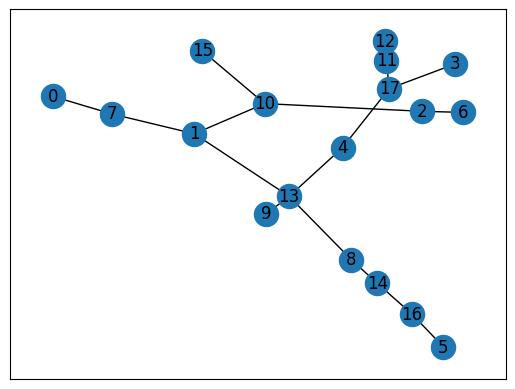

In [24]:
sol_graph = nx.Graph()
count = 0
Temp = {}

for i in range(Nodes):
  sol_graph.add_node(i)

for key, value in Edges.items():
  i, j = key[0], key[1]

  if Visited[i]==Visited[j] and Visited[j] != 0:
    continue

  if Visited[i] == 0 and Visited[j] == 0:
    count += 1
    Visited[i], Visited[j] = count, count
    Solution[i][j], Solution[j][i] = value, value
    sol_graph.add_edge(i, j, weight=value)
    Temp[int(count)] = [i, j]
  elif Visited[i] == 0 and Visited[j] != 0:
    Visited[i] = Visited[j]
    Solution[i][j], Solution[j][i] = value, value
    sol_graph.add_edge(i, j, weight=value)
    Temp[Visited[j]].append(i)
  elif Visited[j] == 0 and Visited[i] != 0:
    Visited[j] = Visited[i]
    Solution[i][j], Solution[j][i] = value, value
    sol_graph.add_edge(i, j, weight=value)
    Temp[Visited[i]].append(j)
  elif Visited[i] != Visited[j]:
    Solution[i][j], Solution[j][i] = value, value
    sol_graph.add_edge(i, j, weight=value)
    Temp[Visited[i]].extend(Temp[Visited[j]])
    X = Temp.pop(Visited[j])
    for x in X:
      Visited[x] = Visited[i]

nx.draw_networkx(sol_graph)

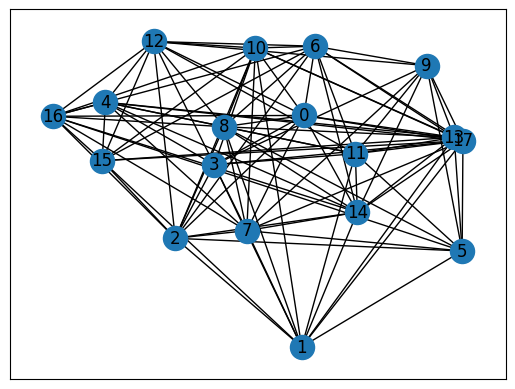

In [25]:
graph = nx.Graph()

for i in range(Nodes):
  graph.add_node(i)

for key, value in Edges.items():
  i, j = key[0], key[1]
  graph.add_edge(i, j, weight=value)

nx.draw_networkx(graph)